# Churn Prediction with Telecommunication Data

This project serves as an example of the `baseline_optimal.class_task` module application.

## 0. Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from baseline_optimal import ClassTask

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Neat and clean import.

## 1. Problem Statement

The dataset used for this project is synthetic from a telecommunications mobile phone carrier which can be found through this [*AWS Machine Learning Blog*](https://aws.amazon.com/blogs/machine-learning/predicting-customer-churn-with-no-code-machine-learning-using-amazon-sagemaker-canvas/).

In the blog, the synthetic dataset is used as an example to showcase the power of [*Amazon SageMaker Canvas*](https://aws.amazon.com/sagemaker/canvas/?sagemaker-data-wrangler-whats-new.sort-by=item.additionalFields.postDateTime&sagemaker-data-wrangler-whats-new.sort-order=desc), which provides a simple interface that allows users to build a customer churn machine learning model without any programming. 

The blog states that the model could score a 97.9% accuracy on this synthetic dataset at its best. Through this project, we want to explore:

- Can we obtain a machine learning pipeline that achieves a higher score?
- Which features are the most influencial in determining whether a customer will churn?

## 2. Data Collection

- Data source: [*AWS Machine Learning Blog*](https://aws.amazon.com/blogs/machine-learning/predicting-customer-churn-with-no-code-machine-learning-using-amazon-sagemaker-canvas/)
- The synthetic dataset contains 5000 observations with 21 variables.

Load the data:

In [3]:
df = pd.read_csv("../data/churn.csv")

Display the first 5 observations:

In [ ]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.


Definitions of independent and dependent variables:

**Features:**

- `State` - The US state in which the customer resides, indicated by a two-letter abbreviation
- `Account Length` – The number of days that this account has been active
- `Area Code` – The three-digit area code of the customer’s phone number
- `Phone` – The remaining seven-digit phone number
- `Int’l Plan` – Whether the customer has an international calling plan (yes/no)
- `VMail Plan` – Whether the customer has a voice mail feature (yes/no)
- `VMail Message` – The average number of voice mail messages per month
- `Day Mins` – The total number of calling minutes used during the day
- `Day Calls` – The total number of calls placed during the day
- `Day Charge` – The billed cost of daytime calls
- `Eve Mins, Eve Calls, Eve Charge` – The billed cost for evening calls
- `Night Mins, Night Calls, Night Charge` – The billed cost for nighttime calls
- `Intl Mins, Intl Calls, Intl Charge` – The billed cost for international calls
- `CustServ Calls` – The number of calls placed to customer service

**Target:**

- `Churn?` – Whether the customer left the service (true/false)

## 3. Exploratory Data Analysis

You know how to do this - we'll just check the target class distribution:

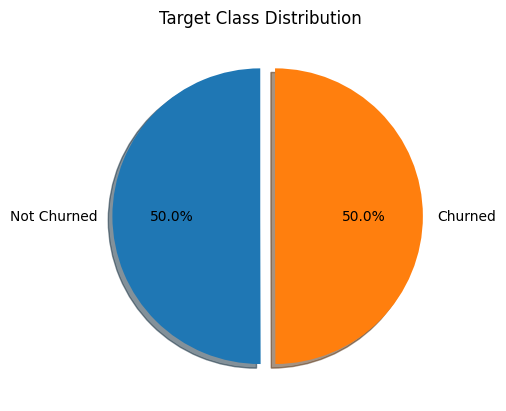

In [8]:
labels = ['Not Churned', 'Churned']
sizes = df['Churn?'].value_counts()
explode = [0, 0.1]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title(label='Target Class Distribution')
plt.show()

The target class is perfectly balanced.

## 4. Data Preparation

We remove `Area Code`, `Phone`, and `State` from the data.

The we separate the features and the target:

In [9]:
drop = ['Area Code', 'Phone', 'State', 'Churn?']
X = df.drop(drop, axis=1)
y = df['Churn?']

Split the training and the test data given ratio 4:1:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Encode the target data as some classifier implementations don't support categorical data:

In [11]:
t_e = LabelEncoder()
y_train = t_e.fit_transform(y_train)
y_test = t_e.transform(y_test)

Minimum efforts on preprocessing the data.

## 5. Optimization and Results

Create a `ClassTask` object:

In [12]:
task = ClassTask()

Search for the optimal pipeline:

In [13]:
task.optimize(X_train, y_train)

The evaluation metric is set as `accuracy` by default. The best cross validation score is 0.95 on the training data:

In [14]:
task.best_score

0.94875

Get probability estimates using the test data:

In [17]:
pred_prob = task.predict(X_test)

Get performance scores on the test data:

In [18]:
scores = task.evaluate(X_test, y_test)
scores

,AUC-ROC,Accuracy,Average Precision,Recall,Precision,F1
0,0.992,0.961,0.991,0.977,0.943,0.96


The optimal pipeline has promising performances across all measures.

Obtain the best `imblearn.pipeline.Pipeline` object:

In [19]:
best_pipeline = task.best_pipeline

Use `imblearn.pipeline.Pipeline` API to get the processing pipeline as well as the estimator:

In [20]:
best_processor = best_pipeline.named_steps['processor']
best_estimator = best_pipeline.named_steps['estimator']

See how the training data is processed and transformed in the optimal pipeline:

In [21]:
best_processor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('numerical_imputer',
                                                  SimpleImputer(fill_value=-1)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Account Length', 'VMail Message', 'Day Mins',
                                  'Day Calls', 'Day Charge', 'Eve Mins',
                                  'Eve Calls', 'Eve Charge', 'Night Mins',
                                  'Night Calls', 'Night Charge', 'Intl Mins',
                                  'Intl Calls', 'Intl Charge',
                                  'CustServ Calls']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ["Int'l Plan", 'VMail Plan'])])

The optimal estimator is a `XGBClassifier` object:

In [22]:
best_estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08044551460612077,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=249, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

Plot the ROC curve:

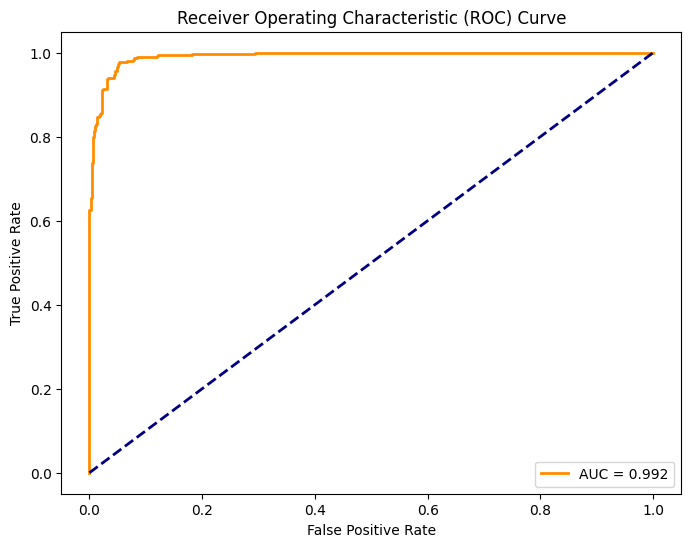

In [23]:
task.plot_roc_curve(X_test, y_test)

Plot the PR curve:

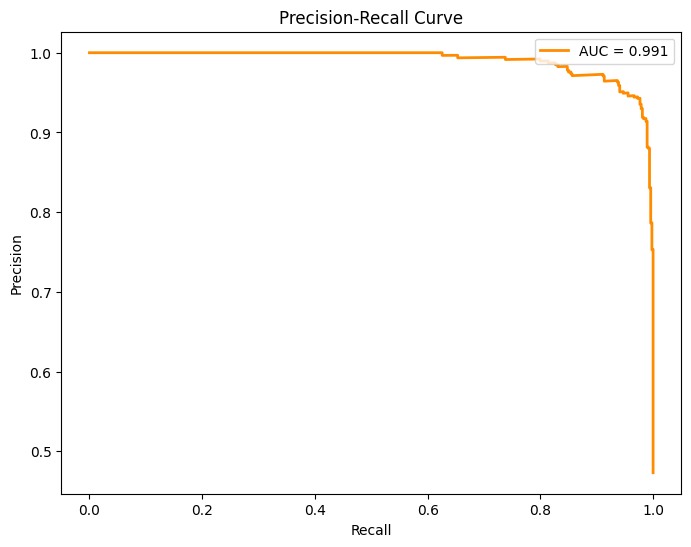

In [24]:
task.plot_pr_curve(X_test, y_test)

Plot the confusion matrix:

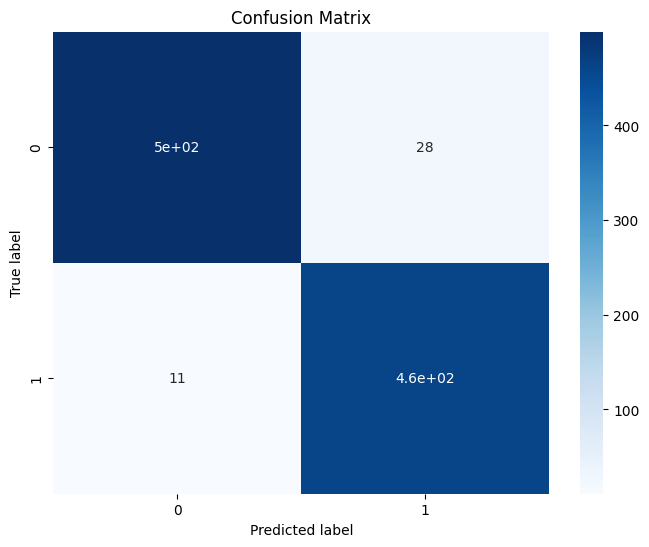

In [25]:
task.plot_confusion_matrix(X_test, y_test)

We barely see misclassified instances.

Note that because we didn't set `select=True` in the `optimize` function, all features are considered. Plot feature importances based on Shapley values:

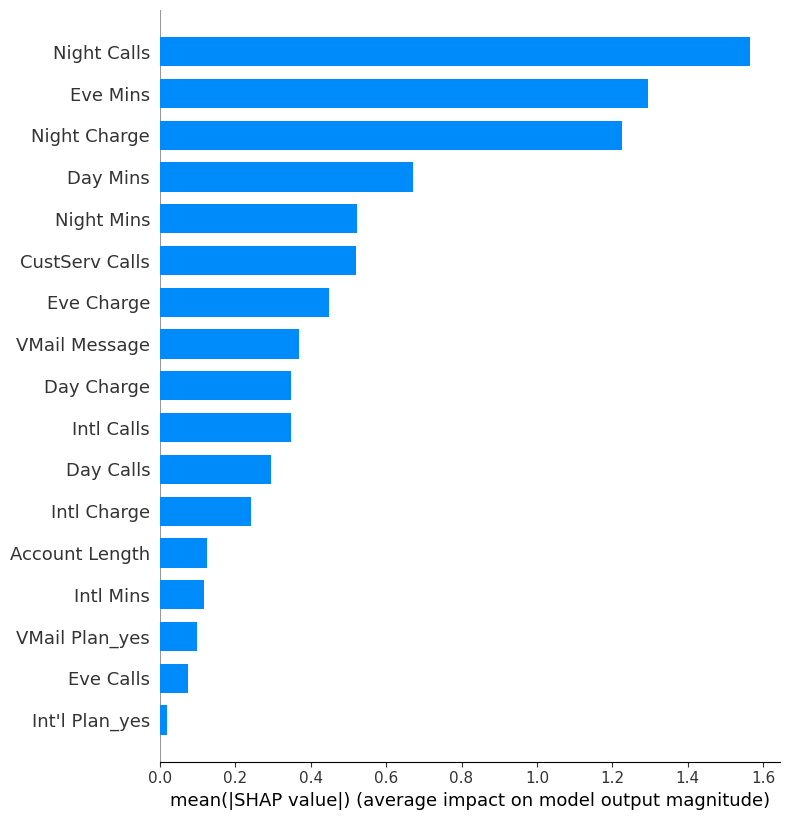

In [26]:
task.plot_feature_importances(X_test)

The SHAP values are telling us that on average, `Night Calls`, `Eve Mins`, and `Night Charge` are the most important features contributing to the predictions.

Meanwhile, `Int'l Plan_yes` is weighted the least.

Next, visualize the directionality impact of the features:

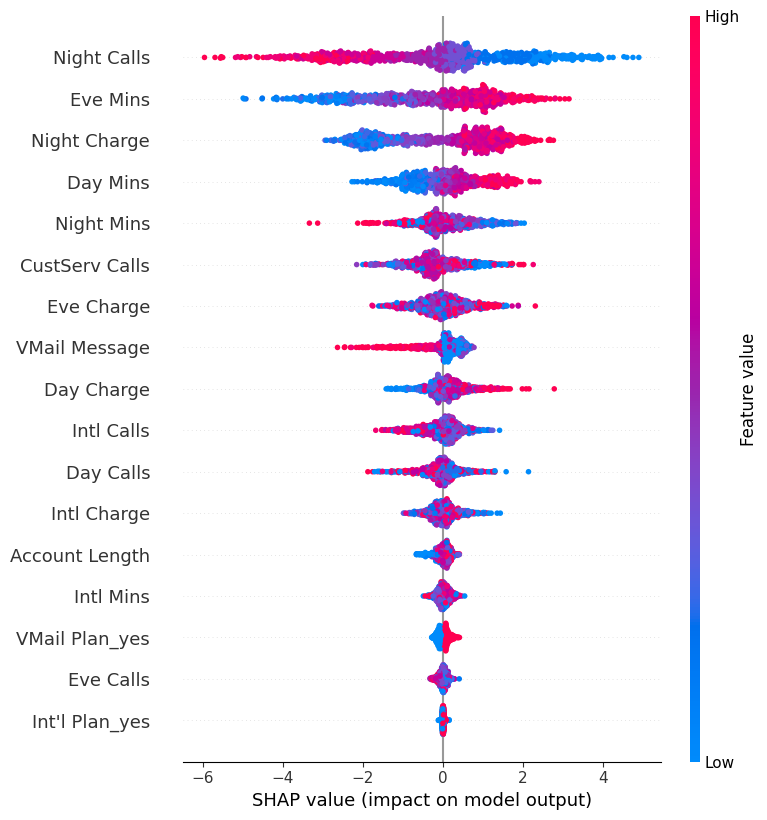

In [28]:
task.plot_feature_directionality(X_test)

Some quick insights:

1. The more clients call at night, the less likely they will churn.
2. The longer clients call in evening, the less likely they will churn.
3. The higher the billed cost is for nighttime calls, the less likely clients will churn.
4. Can barely tell how values of `Int'l Plan_yes` are associated with churn behaviors.

## 6. Conclusion

Some quick results:

1. Although we didn't achieve a better score, 96.1% accuracy comparing to 97.9%, we achieve it fast and we are happy to accept it.
2. `Night Calls`, `Eve Mins`, and `Night Charge` are the most influencial in determining whether a customer will churn, and we studied how their values will affect the churn behaviors.